# Proyecto Final - Covid-19 Analysis

### By: Fernanda González, Keily Marín, Samuel Lasso, Miguel Rodríguez, Carlos Serrano & Iván Valdés

### Importing the libraries to use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
print('-> All libraries imported successfully.')

-> All libraries imported successfully.


In [2]:
df = pd.read_csv('Covid Data.csv')
print ('-> CSV file imported successfully.')

-> CSV file imported successfully.


### Data preparation and cleaning

In [3]:
#Evaluate if there are empty fields in the data.
empty_fields = df.isnull()
count_of_false_data = (empty_fields == False).sum()
print(count_of_false_data)

USMER                   1048575
MEDICAL_UNIT            1048575
SEX                     1048575
PATIENT_TYPE            1048575
DATE_DIED               1048575
INTUBED                 1048575
PNEUMONIA               1048575
AGE                     1048575
PREGNANT                1048575
DIABETES                1048575
COPD                    1048575
ASTHMA                  1048575
INMSUPR                 1048575
HIPERTENSION            1048575
OTHER_DISEASE           1048575
CARDIOVASCULAR          1048575
OBESITY                 1048575
RENAL_CHRONIC           1048575
TOBACCO                 1048575
CLASIFFICATION_FINAL    1048575
ICU                     1048575
dtype: int64


In [4]:
# Checking if there's null data, but with the values of null data in this particular data set
df_null = df.copy() #I'm creating a copy of the dataframe to not affect the original
for i in [97, 98, 99]:
    df_null.replace(i, np.nan, inplace = True)

In [5]:
df_null.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

In [6]:
# Checking the relation between pacient type and his intubation, contemplating the null data
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print (f"At PATIENT_TYPE = {j} and at INTUBED = {i} the shape will be:")
        print (df[(df['PATIENT_TYPE'] == j) & (df['INTUBED'] == i)].shape, "\n",
               "-------------------------------------------------------------------", "\n")

At PATIENT_TYPE = 1 and at INTUBED = 1 the shape will be:
(0, 21) 
 ------------------------------------------------------------------- 

At PATIENT_TYPE = 2 and at INTUBED = 1 the shape will be:
(33656, 21) 
 ------------------------------------------------------------------- 

At PATIENT_TYPE = 1 and at INTUBED = 2 the shape will be:
(0, 21) 
 ------------------------------------------------------------------- 

At PATIENT_TYPE = 2 and at INTUBED = 2 the shape will be:
(159050, 21) 
 ------------------------------------------------------------------- 

At PATIENT_TYPE = 1 and at INTUBED = 97 the shape will be:
(848544, 21) 
 ------------------------------------------------------------------- 

At PATIENT_TYPE = 2 and at INTUBED = 97 the shape will be:
(0, 21) 
 ------------------------------------------------------------------- 

At PATIENT_TYPE = 1 and at INTUBED = 99 the shape will be:
(0, 21) 
 ------------------------------------------------------------------- 

At PATIENT_TYPE =

### Cleaning the date_died column

#### Python treats the Objects as a string, so we can make some changes in it.

In [7]:
# Creating a special column, assigning a 1 if the person died or a 0 if the person didn't died.
df_null['DEAD'] = [2 if i=='9999-99-99' else 1 for i in df_null.DATE_DIED]

In [8]:
# Replacing each 9999-99-99 value for a null value (NaN)
df_null['DATE_DIED'].replace('9999-99-99', np.nan, inplace = True)

In [9]:
# The new df_null dataset
df_null

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,03/05/2020,NaN,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1
1,2,1,2,1,03/06/2020,NaN,1.0,72.0,NaN,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN,1
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,12/06/2020,NaN,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,1
4,2,1,2,1,21/06/2020,NaN,2.0,68.0,NaN,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaN,NaN,2.0,40.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2
1048571,1,13,2,2,NaN,2.0,2.0,51.0,NaN,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,2
1048572,2,13,2,1,NaN,NaN,2.0,55.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2
1048573,2,13,2,1,NaN,NaN,2.0,28.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2


### Cleaning up the classification of contagions

In [10]:
# We make a function to evaluate whether or not patients were detected with Covid, adding a column to locate them more easily.
def Covid_Not_Covid(val):
    if val >= 4:
        return 2
    else:
        return 1

In [11]:
# We create a new column to show the result of the application of the function created above.
df_null['Covid_Not_Covid'] = df_null["CLASIFFICATION_FINAL"].apply(Covid_Not_Covid)

In [12]:
# The new df_null dataset
df_null

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_Not_Covid
0,2,1,1,1,03/05/2020,NaN,1.0,65.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1,1
1,2,1,2,1,03/06/2020,NaN,1.0,72.0,NaN,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN,1,2
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,1
3,2,1,1,1,12/06/2020,NaN,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,1,2
4,2,1,2,1,21/06/2020,NaN,2.0,68.0,NaN,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaN,NaN,2.0,40.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2,2
1048571,1,13,2,2,NaN,2.0,2.0,51.0,NaN,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,2,2
1048572,2,13,2,1,NaN,NaN,2.0,55.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2,2
1048573,2,13,2,1,NaN,NaN,2.0,28.0,NaN,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2,2


___

# MOSCOW Part

## Promedio de edad de personas infectadas

---

## Cantidad de pacientes que murieron, porcentaje de edad

***

## Tasa de fallecimiento por condición de riesgo

---

## Identificar la cantidad de casos positivos y el tipo de atención recibida

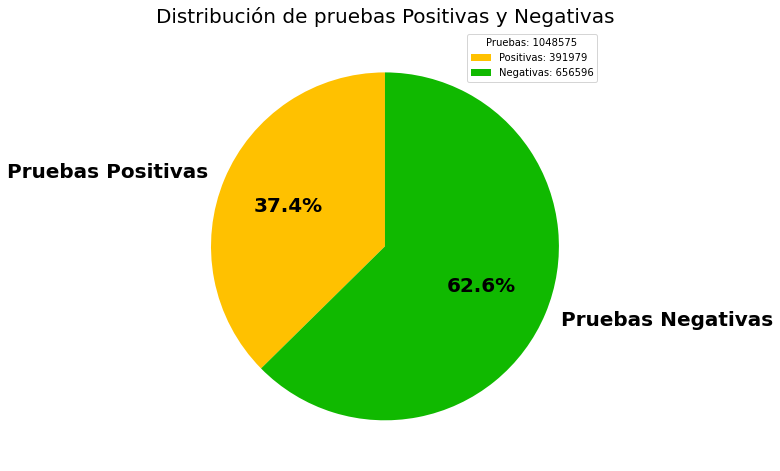

In [13]:
#Evaluating the total number of positive and negatives cases.
classification = np.array(df_null['CLASIFFICATION_FINAL']); #Array for storing 'CLASIFFICATION_FINAL' data.

positive_tests = np.count_nonzero(classification <= 3) #Total of occurrence of numbers less than or equal to 3.
negative_tests = np.count_nonzero(classification >= 4) #Total of occurrence of numbers grater than or equal to 4.
total_cases = positive_tests + negative_tests

#Pie chart showing the difference between positive and negative cases
sizes = [positive_tests, negative_tests]
labels = ['Pruebas Positivas', 'Pruebas Negativas']
colors = ['#FFC100', '#10B900']

plt.figure(figsize = (8,8))
plt.title('Distribución de pruebas Positivas y Negativas', fontsize = 20)
plt.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%', textprops = {'fontsize':20, 'weight': 'bold'}, startangle = 90)
plt.legend([f'Positivas: {positive_tests}', f'Negativas: {negative_tests}'], title = f'Pruebas: {total_cases}', loc = 'upper right')
plt.show()

NameError: name 'total_positives' is not defined

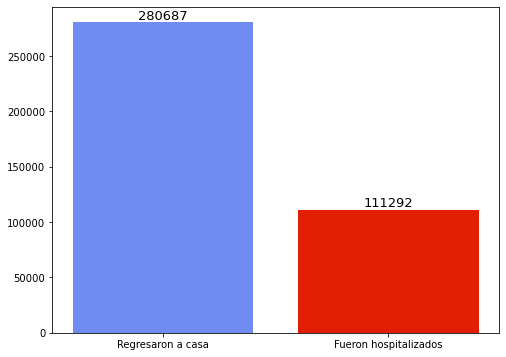

In [14]:
#Atenttion type received by positive cases.
positive_cases = df_null[df_null['CLASIFFICATION_FINAL'] <= 3] #Filter positive cases.

#Occurrences per patient.
attention_counts = positive_cases['PATIENT_TYPE'].value_counts()

#Assign a label and show the results
if 1 in attention_counts.index:
    patient_type_home = attention_counts[1]

if 2 in attention_counts.index:
    patient_type_hospitalized = attention_counts[2]

#Graph to show the difference between people who went home and those who were hospitalized.
fruits = ['Regresaron a casa', 'Fueron hospitalizados']
counts = [patient_type_home, patient_type_hospitalized]
bar_labels = ['Volvieron a casa', 'Fueron hospitalizados']
bar_colors = ['#708BF1', '#E11F00']

fig, ax = plt.subplots(figsize = (8,6))
bars = ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

#Show the occurrences on the bars.
for bar in bars:
    x_val = bar.get_x() + bar.get_width() / 2
    y_val = bar.get_height()
    ax.text(x_val, y_val, f'{y_val}', ha='center', va='bottom', fontsize = 13)

#Show the mean of each selection inside the bars.
for means in bars:
    x_val = means.get_width()
    y_val = means.get_height()
    mean = (y_val / total_positives) * 100
    ax.text(means.get_x() + x_val/2, y_val/2, f'{mean:.1f}%', ha='center', va='center', fontsize = 20)


#Adding labels and designs to the chart
ax.set_ylabel('Número de Pacientes', fontsize = 15)
ax.set_title('Atención recibida por casos positivos', fontsize = 20)
ax.legend(title = 'Tipo de Paciente')
ax.tick_params(axis='x', labelsize=15)
plt.show()

In [ ]:
#Show the percentage of infected patients who died.
infected_who_died = df_null[(df_null['CLASIFFICATION_FINAL'] <= 3) & (df_null['DEAD'] == 1)]
infected_who_died 

In [ ]:
#Save the total number of patients who were infected and died 
hospitalized_who_died = infected_who_died['PATIENT_TYPE'].value_counts()

if 1 in hospitalized_who_died.index:
    not_hospitalized_death = hospitalized_who_died[1]

if 2 in hospitalized_who_died.index:
    hospitalized_death = hospitalized_who_died[2]

hospitalized_survived = patient_type_hospitalized - hospitalized_death
#Pie chart to show the difference between hospitalized patient and hospitalized who died.
sizes = [hospitalized_survived, hospitalized_death]
labels = ['Hospitalizados supervivientes', 'Hospitalizados fallecidos']
colors = ['#F1C670', '#DC70F1']

plt.figure(figsize = (9,9))
plt.title('Porcentaje de mortalidad de las personas hospitalizadas', fontsize = 20)
plt.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%', textprops = {'fontsize':20}, startangle = 90, explode=[0.02, 0.02])
plt.legend([f'Supervivientes: {hospitalized_survived}', f'Fallecidos: {hospitalized_death}'], title = f'Hospitalizados: {patient_type_hospitalized}', loc = 'upper right')
plt.show()

In [ ]:
#Pie chart to show the difference between home patient and home who died.
sizes = [patient_type_home, not_hospitalized_death]
labels = ['Sobreviviente en casa', 'Fallecido en casa']
colors = ['#7470F1', '#F1A770']

home_survived = patient_type_home - not_hospitalized_death
plt.figure(figsize = (9,9))
plt.title('Porcentaje de mortalidad de personas en casa', fontsize = 20)
plt.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%', textprops = {'fontsize':20}, startangle = 50, explode=[0.02, 0.02])
plt.legend([f'Supervivientes: {home_survived}', f'Fallecidos: {not_hospitalized_death}'], title = f'Hospitalizados: {patient_type_home}', loc = 'upper right')
plt.show()

<h3>Conclusiones del apartado </h3>

- De un total de 1048575 de casos reportados, solo 391979 fueron diagnosticados con COVID-19 en diferentes grados, lo que significa que había una posibilidad de 37.4% de ser diagnosticado positivo y un 62.56% de ser diagnosticado como negativo.

- De todos los casos diagnosticados como COVID-19 positivo, la probabilidad de que el paciente regresara a casa era de un 71.6%, dejando un margen mínimo de que el paciente necesitara ser hospitalizado para tratar la afección.

- La probabilidad de que los pacientes hospitalizados fallecieran, era casi de un 50%, lo que nos permite identificar que el sesgo de supervivencia era mínimo y la distribución de estadísticas, era casi similar.

- En cuanto a los pacientes que regresaron a casa, la tasa de mortalidad fue de 1.8%, dando como resultado una posibilidad de supervivencia mayoritaria.


---

## Total de casos detectados

---

## Porcentaje de Infantes contagiados con su porcentaje de mortalidad

Cabe destacar que se tomó como referencia a niños menores de 12 años, pues según estudios a partir de los 12 años empieza la adolescencia.

In [ ]:
# Creating a special dataframe only for the kids in the dataset
df_kids = df_null[df_null['AGE'] < 12].copy()
df_kids

In [ ]:
# Checking the amount of kids with or without Covid
df_kids["Covid_Not_Covid"].value_counts()
# Understanding that value 1 means that they are infected and value 2 means that they are not infected.

In [ ]:
# Creating a graph to make visible the percentage of infected and non-infected children.
labels = ["No tiene Covid", "Tiene Covid"]
sizes = df_kids['Covid_Not_Covid'].value_counts()
colors = ['#77FF88', '#A078FF']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Porcentaje de infantes contagiados entre los mismos infantes', color = '#FF6969', fontsize = 30)
plt.legend(df_kids['Covid_Not_Covid'].value_counts(), loc = 'lower right', title = 'Conteo')
plt.show()

In [ ]:
#Creating a graph to obtain the number of infected children among all patients.
ninos_cont = df_null[(df_null['AGE'] < 12) & (df_null['Covid_Not_Covid'] == 1)].shape[0]
adultos_cont = df_null[(df_null['AGE'] >= 12) & (df_null['Covid_Not_Covid'] == 1)].shape[0]

labels = ["Niños", "Adolescentes y Adultos"]
sizes = [ninos_cont, adultos_cont]
colors = ['#77FF88', '#A078FF']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Porcentaje de infantes contagiados entre todos los contagiados', color = '#FF6969', fontsize = 30)
plt.legend([ninos_cont, adultos_cont], loc = 'lower right', title = 'Conteo')
plt.show()

In [ ]:
print("Niños contagiados: ", ninos_cont)
print("Adolescentes y adultos contagiados: ", adultos_cont)

##### We have to take into account that there are 345 missing data in the age column, and here we reflect a lack of 126 people who are infected, but do not have data on their age.

### Porcentaje de mortalidad entre los niños contagiados

In [ ]:
# Creating a variable or array containing only the infected children.
kids_infected = df_kids[(df_kids['Covid_Not_Covid'] == 1)]

In [ ]:
# Checking the count of death and alive children.
kids_infected["DEAD"].value_counts()

In [ ]:
# Creating the graph to better observe the percentage of mortality.
labels = ["Vivos", "Muertos"]
sizes = kids_infected['DEAD'].value_counts()
colors = ['#496780', '#FF1B12']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Porcentaje de mortalidad entre los niños contagiados',color = 'red',fontsize = 30)
plt.legend(kids_infected['DEAD'].value_counts(), loc = 'lower right', title = 'Porcentaje de Mortalidad')
plt.show()

In [ ]:
# Creating a dataframe only for the dead infected children.
inf_kids_dead = kids_infected[(kids_infected['DEAD'] == 1)]
# Checking the age distribution between the infected children.
plt.figure(figsize=(8, 8))
sns.histplot(inf_kids_dead['AGE'], bins=10, color='skyblue', kde=False)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

In [ ]:
inf_kids_dead['AGE'].value_counts()

### Porcentaje de mortalidad de todos los niños en el dataset

In [ ]:
# Creating a graph to see the percentage of dead kids infected or not infected with Covid-19
labels = ["Vivos", "Muertos"]
sizes = df_kids['DEAD'].value_counts()
colors = ['#496780', '#FF1B12']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Porcentaje de mortalidad de todos los niños registrados',color = 'red',fontsize = 30)
plt.legend(df_kids['DEAD'].value_counts(), loc = 'lower right', title = 'Porcentaje de Mortalidad')
plt.show()

In [ ]:
# Creating a dataframe only for the dead children.
kids_dead = df_kids[(df_kids['DEAD'] == 1)]
# Checking the age distribution between all the death kids.
plt.figure(figsize=(8, 8))
sns.histplot(kids_dead['AGE'], bins=10, color='skyblue', kde=False)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

In [ ]:
kids_dead['AGE'].value_counts()

### Conclusiones en el apartado

- De un total de 33904 niños a los cuales se les hicieron pruebas de Covid, solo 5131 salieron positivos en uno de los tres niveles de detección; lo que representa solo un 15.1% de esa población de niños.

- De todos los pacientes que fueron detectados y que conocemos su edad, solo representan un 1.3%, por ende, los niños no representan una gran cantidad de casos positivos en el estudio.

- El porcentaje de mortalidad en los niños contagiados es bastante bajo, con solo un 2.8%, lo que equivale a solo 143 niños que murieron.

- La edad con mayor tasa de mortalidad en niños contagiados son los 0 años con 48 defunciones y le sigue 1 año de edad con 38 defunciones, siendo las dos edades con mayor porcentaje de mortalidad.

- De todos los niños registrados, hubieron 650 que murieron, de los cuales solo 143 fueron detectados con Covid-19 y representan un porcentaje de mortalidad de 1.9%.

- Las edades con las tasas de mortalidad más altas fueron los 0 a los 11 años, pero la edad con más mortalidad son los 0 años, con 209 muertes.

***